# Chapter 5 - Data Mining

If Alice and Bob largely like the same movies (say The Lion King, Aladdin, and Toy Story) and Alice also likes Finding Nemo, it is extremely likely that Bob, who hasn't watched Finding Nemo, will like it too. This is called collaborative filter.

It is important that we have a good grasp of the underlying techniques, principles, and algorithms that go into building collaborative filters. 
Therefore, in this chapter, we will cover the following topics:

<div style="text-align:center;">
    <img src='images/cf.jpg' width='500'>
</div>

# Similarity Measures

### Euclidean Score

The Euclidean distance is able to satisfactorily capture the relationships between our users.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Function to compute Euclidean Distance. 
def euclidean(v1, v2):
    
    #Convert 1-D Python lists to numpy vectors
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    #Compute vector which is the element wise square of the difference
    diff = np.power(np.array(v1)- np.array(v2), 2)
    
    #Perform summation of the elements of the above vector
    sigma_val = np.sum(diff)
    
    #Compute square root and return final Euclidean score
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score

In [3]:
#Define 3 users with ratings for 5 movies
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

In [4]:
euclidean(u1, u2)

7.483314773547883

In [5]:
euclidean(u1, u3)

1.4142135623730951

### Pearson Correlation

In [6]:
alice = [1,1,3,2,4]
bob = [2,2,4,3,5]

euclidean(alice, bob)

2.23606797749979

In [7]:
eve = [5,5,3,4,2]

euclidean(eve, alice)

6.324555320336759

We get a very high score of 6.32, which indicates that the two people are very dissimilar. If we used Euclidean distances, we would not be able to do much beyond this. However, on inspection, we see that the sum of Alice's and Eve's ratings for a movie always add up to 6. Therefore, although very different people, one's rating can be used to accurately predict the corresponding rating of the other. Mathematically speaking, we say Alice's and Eve's ratings are strongly negatively correlated.

<div style="text-align:center;">
    <img src='images/pearson.jpg' width='500'>
</div>

In [8]:
from scipy.stats import pearsonr

pearsonr(alice, bob)

PearsonRResult(statistic=1.0, pvalue=0.0)

In [9]:
pearsonr(alice, eve)

PearsonRResult(statistic=-1.0, pvalue=0.0)

# Clustering

### K-Means

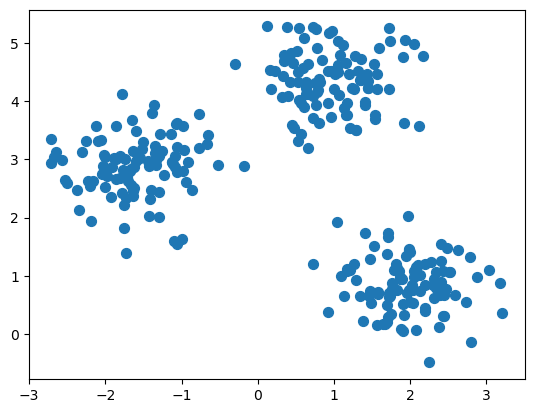

In [10]:
#Import the function that enables us to plot clusters
from sklearn.datasets import make_blobs

#Get points such that they form 3 visually separable clusters
X, y = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.50, random_state=0)

#Plot the points on a scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50);

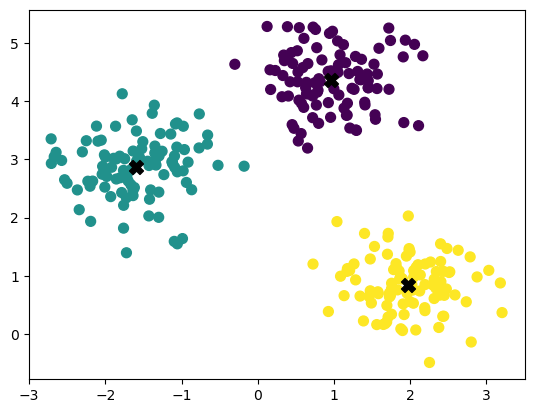

In [11]:
#Import the K-Means Class
from sklearn.cluster import KMeans

#Initializr the K-Means object. Set number of clusters to 3, 
#centroid initilalization as 'random' and maximum iterations to 10
kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

#Compute the K-Means clustering 
kmeans.fit(X)

#Predict the classes for every point
y_pred = kmeans.predict(X)

#Plot the data points again but with different colors for different classes
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

#Get the list of the final centroids
centroids = kmeans.cluster_centers_

#Plot the centroids onto the same scatterplot.
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

### Choosing K

<Axes: >

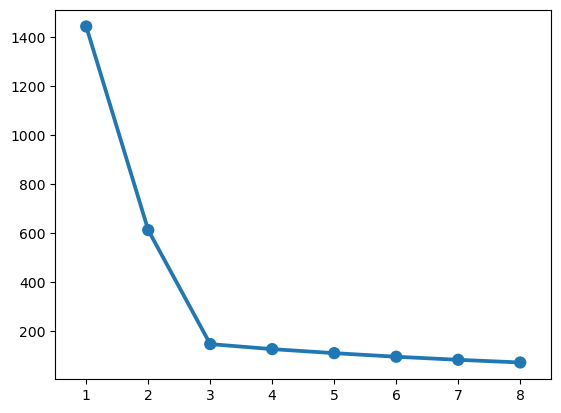

In [12]:
#List that will hold the sum of square values for different cluster sizes
ss = []

#We will compute SS for cluster sizes between 1 and 8.
for i in range(1,9):
    
    #Initlialize the KMeans object and call the fit method to compute clusters 
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    #Append the value of SS for a particular iteration into the ss list
    ss.append(kmeans.inertia_)

#Plot the Elbow Plot of SS v/s K
sns.pointplot(x=[j for j in range(1,9)], y=ss)

### Other Clustering Algorithms

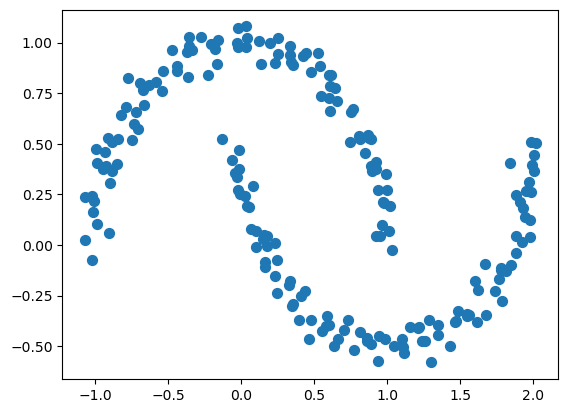

In [13]:
#Import the half moon function from scikit-learn
from sklearn.datasets import make_moons

#Get access to points using the make_moons function
X_m, y_m = make_moons(200, noise=.05, random_state=0)

#Plot the two half moon clusters
plt.scatter(X_m[:, 0], X_m[:, 1], s=50);

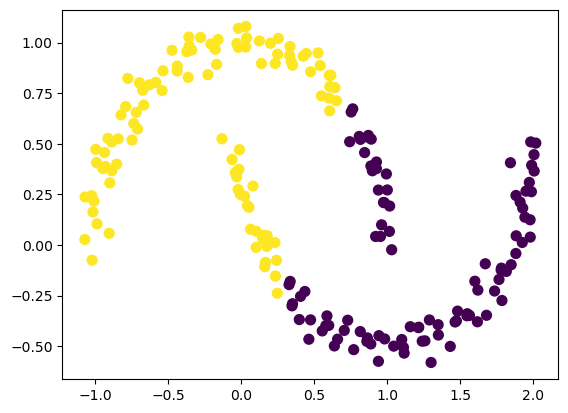

In [14]:
#Initialize K-Means Object with K=2 (for two half moons) and fit it to our data
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

#Predict the classes for the data points
y_m_pred = kmm.predict(X_m)

#Plot the colored clusters as identified by K-Means
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

We see that the k-means algorithm doesn't do a very good job of identifying the correct clusters. For clusters such as these half moons, another
algorithm, called spectral clustering, with nearest-neighbor, affinity performs much better.

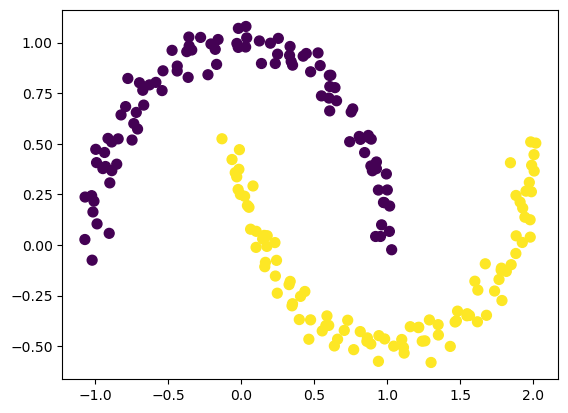

In [15]:
#Import Spectral Clustering from scikit-learn
from sklearn.cluster import SpectralClustering

#Define the Spectral Clustering Model
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

#Fit and predict the labels
y_m_sc = model.fit_predict(X_m)

#Plot the colored clusters as identified by Spectral Clustering
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50);

# Dimensionality Reduction

Most machine learning algorithms tend to perform poorly as the number of dimensions in the data increases. This phenomenon is often known as the curse of dimensionality. Therefore, it is a good idea to reduce the number of features available in the data, while retaining the maximum amount of information possible.

There are two ways to achieve this:

**Feature selection:** This method involves identifying the features that have the least predictive power and dropping them altogether. Therefore, feature selection involves identifying a subset of features that is most important for that particular use case. An important distinction of feature selection is that it maintains the original meaning of every retained feature. For example, let's say we have a housing dataset with price, area, and number of rooms as features. Now, if we were to drop the area feature, the remaining price and number of rooms features will still mean what they did originally.

**Feature extraction:** Feature extraction takes in m-dimensional data and transforms it into an n-dimensional output space (usually where m >> n), while retaining most of the information. However, in doing so, it creates new features that have no inherent meaning. For example, if we took the same housing dataset and used feature extraction to output it into a 2D space, the new features won't mean price, area, or number of rooms. They will be devoid of any meaning.

### Principal Component Analysis
(Feature extraction)

The linear transformation in PCA is done in such a way that the first principal component holds the maximum variance (or information). It does so by considering those variables that are highly correlated to each other. Every principal component has more variance than every succeeding component and is orthogonal to the preceding component.

<div style="text-align:center;">
    <img src='images/pca.jpg' width='600'>
</div>

In [16]:
# Load the Iris dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])

#Display the head of the dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The PCA algorithm is extremely sensitive to scale. Therefore, we are going to scale all the features in such a way that they have a mean of 0 and a variance of 1:

In [17]:
#Import Standard Scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

#Separate the features and the class
X = iris.drop('class', axis=1)
y = iris['class']

# Scale the features of X
X = pd.DataFrame(StandardScaler().fit_transform(X), 
                 columns = ['sepal_length','sepal_width','petal_length','petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


We're now in a good place to apply the PCA algorithm. Let's transform our data into the two-dimensional space:

In [18]:
#Import PCA
from sklearn.decomposition import PCA

#Intialize a PCA object to transform into the 2D Space.
pca = PCA(n_components=2)

#Apply PCA
pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data = pca_iris, columns = ['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


The scikit-Learn's PCA implementation also gives us information about the ratio of variance contained by each principal component:

In [19]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

We see that the first principal component holds about 72.8% of the information, whereas the second principal component holds about 23.3%. In total, 95.8% of the information is retained, whereas 4.2% of the information is lost in removing two dimensions.

In [20]:
#Concatenate the class variable
pca_iris = pd.concat([pca_iris, y], axis = 1)

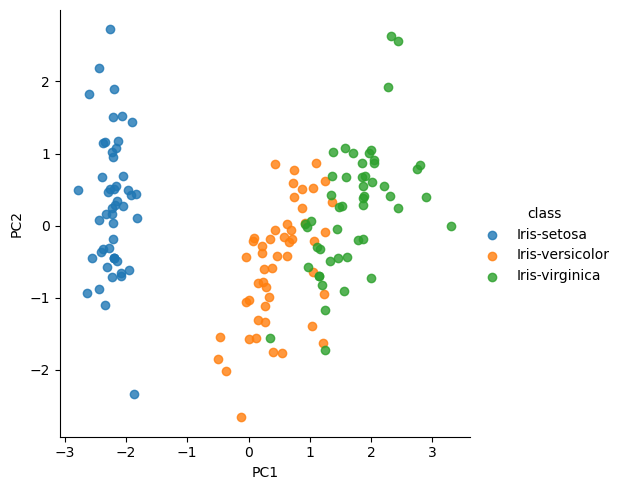

In [21]:
#Display the scatterplot
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

# Supervised Learning

### Linear-Discriminant Analysis

Like PCA, linear-discriminant analysis is a linear transformation method that aims to transform m-dimensional data into an n-dimensional output space.
    
However, unlike PCA, which tries to retain the maximum information, LDA aims to identify a set of n features that result in the maximum separation (or
discrimination) of classes. Since LDA requires labeled data in order to determine its components, it is a type of supervised learning algorithm.

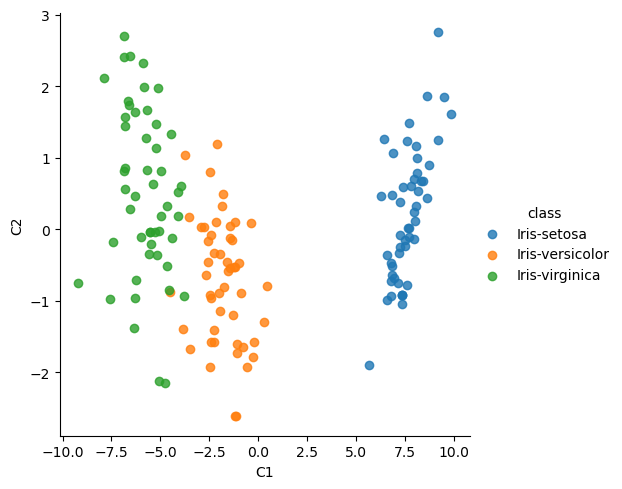

In [22]:
#Import LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Define the LDA Object to have two components
lda = LinearDiscriminantAnalysis(n_components = 2)

#Apply LDA
lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

#Concatenate the class variable
lda_iris = pd.concat([lda_iris, y], axis = 1)

#Display the scatterplot
sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

We see that the classes are much more separable than in PCA.

### Gradient Boosting

In [23]:
#Divide the dataset into the feature dataframe and the target class series.
X, y = iris.drop('class', axis=1), iris['class']

#Split the data into training and test datasets. 
#We will train on 75% of the data and assess our performance on 25% of the data

#Import the splitting funnction
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

#Apply Gradient Boosting to the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

#Compute the accuracy on the test set
gbc.score(X_test, y_test)

0.9736842105263158

We see that the classifier achieves a 97.3% accuracy on the unseen test data. Like random forests, gradient boosting machines are able to gauge the
predictive power of each feature. Let's plot the feature importances of the Iris dataset:

<Axes: >

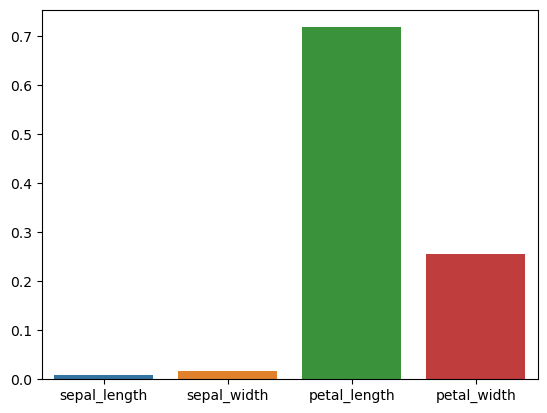

In [24]:
#Display a bar plot of feature importances
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y=gbc.feature_importances_)

### Singular Value Decomposition

Singular value decomposition, or SVD, is a type of matrix analysis technique that allows us to represent a high-dimensional matrix in a lower dimension.
SVD achieves this by identifying and removing the less important parts of the matrix and producing an approximation in the desired number of dimensions.

The SVD approach to collaborative filtering was first proposed by Simon Funk and proved to be extremely popular and effective during the Netflix
prize competition. We will use a black box implementation of the SVD collaborative filter as provided by the surprise package in the next chapter.